In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv("months.csv")
df

,day,A,S,O
0,1,55.5,52.19,46.92
1,2,39.2,42.51,37.24
2,3,31.7,35.39,30.12
3,4,33.0,36.31,31.04
4,5,27.1,23.79,18.52
5,6,22.0,25.31,20.04
6,7,9.7,6.39,1.12
7,8,6.2,9.51,4.24
8,9,11.5,14.81,NaN
9,10,1.6,-1.71,NaN


In [3]:
x, days = df[["A", "S", "O"]], df["day"].values.reshape(-1, 1)

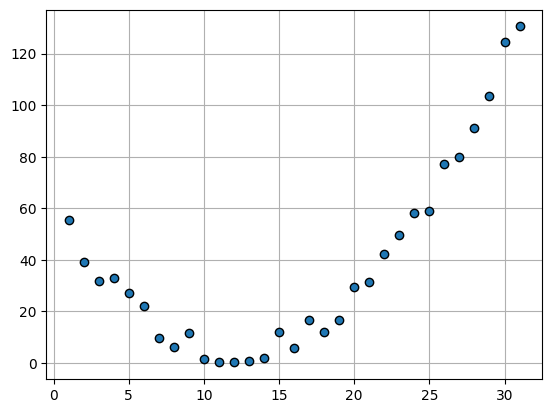

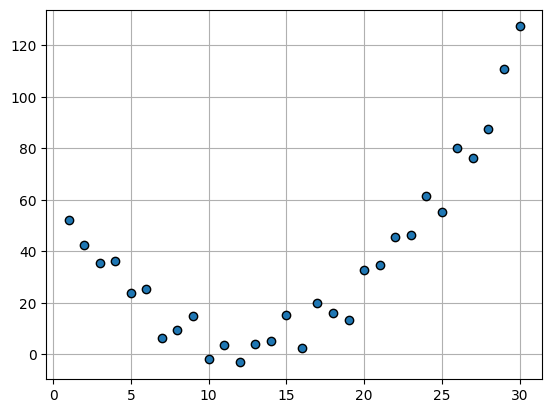

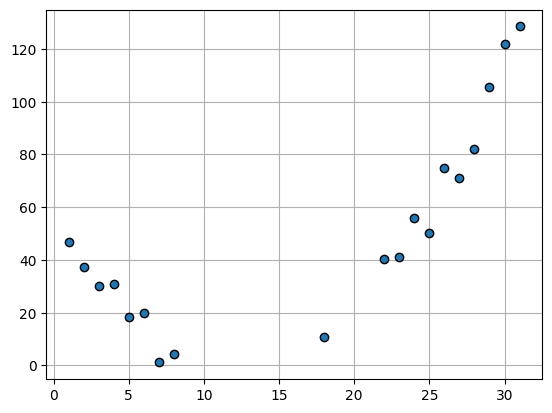

In [4]:
for month in x.columns:
    plt.scatter(days, x[month], ec="k", zorder=3)

    plt.grid()
    plt.show()

In [5]:
def make_model(days, x):
    mask = ~np.isnan(x)
    days, x = days[mask], x[mask]

    model = make_pipeline(
        PolynomialFeatures(3),
        LinearRegression()
    )

    model.fit(days, x)

    return model

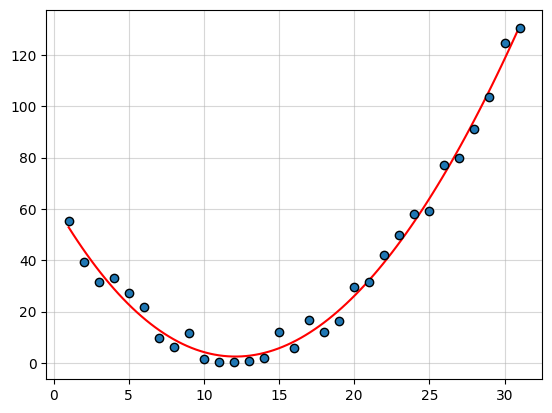

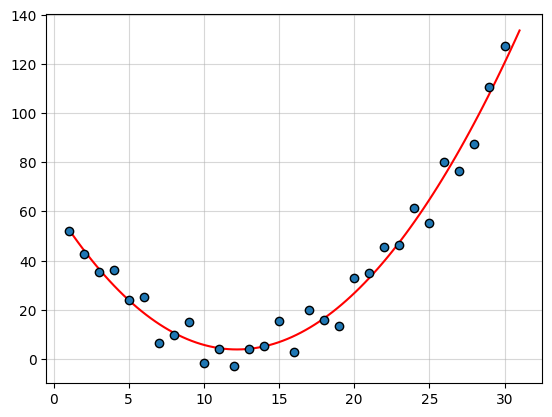

In [6]:
for month in x.columns[:-1]:
    x_month = x[month].values
    model = make_model(days, x_month)

    x_days = np.linspace(1, len(x_month), 100).reshape(-1, 1)
    y_pred = model.predict(x_days)

    plt.scatter(days, x_month, ec="k", zorder=3)
    plt.plot(x_days, y_pred, c="r")

    plt.grid(alpha=.5)
    plt.show()

In [7]:
df = pd.read_csv("months.csv")

days = df["day"].values.reshape(-1, 1)

august = df["A"].values
september = df["S"].values
october = df["O"].values

mask_august  = ~np.isnan(august)
mask_september = ~np.isnan(september)

days_august  = days[mask_august]
days_september = days[mask_september]

august_clean = august[mask_august]
september_clean = september[mask_september]

In [8]:
days_combine = np.vstack([days_august , days_september])
values_combine = np.concatenate([august_clean, september_clean])

model_august_september = make_model(days_combine, values_combine)

In [9]:
nan_october = np.isnan(october)
days_october = days[nan_october]

In [10]:
pred_october = model_august_september.predict(days_october)

october_new = october.copy()
for i, day in enumerate(np.where(nan_october)[0]):
    october_new[day] = pred_october[i]

new_df = pd.DataFrame({
    "day": df["day"],
    "A": august,
    "S": september,
    "O": october,
    "O_new": october_new
})

new_df

,day,A,S,O,O_new
0,1,55.5,52.19,46.92,46.920000
1,2,39.2,42.51,37.24,37.240000
2,3,31.7,35.39,30.12,30.120000
3,4,33.0,36.31,31.04,31.040000
4,5,27.1,23.79,18.52,18.520000
5,6,22.0,25.31,20.04,20.040000
6,7,9.7,6.39,1.12,1.120000
7,8,6.2,9.51,4.24,4.240000
8,9,11.5,14.81,NaN,6.994111
9,10,1.6,-1.71,NaN,4.930251


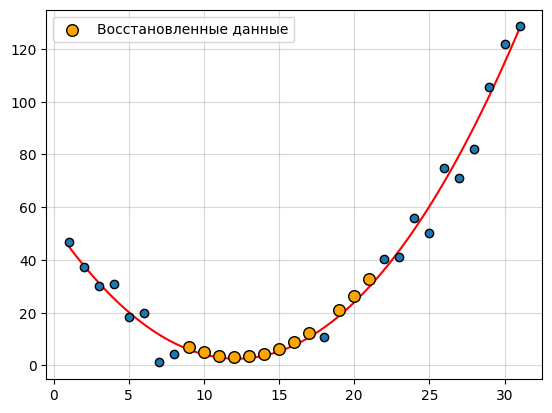

In [11]:
x_month = new_df["O_new"].values
model = make_model(days, x_month)

x_days = np.linspace(1, len(x_month), 100).reshape(-1, 1)
y_pred = model.predict(x_days)

plt.scatter(days, x_month, ec="k", zorder=3)
plt.plot(x_days, y_pred, c="r")
plt.scatter(days_october, pred_october, ec="k", c="orange", s=70, label="Восстановленные данные", zorder=3)

plt.grid(alpha=.5)
plt.legend()
plt.show()

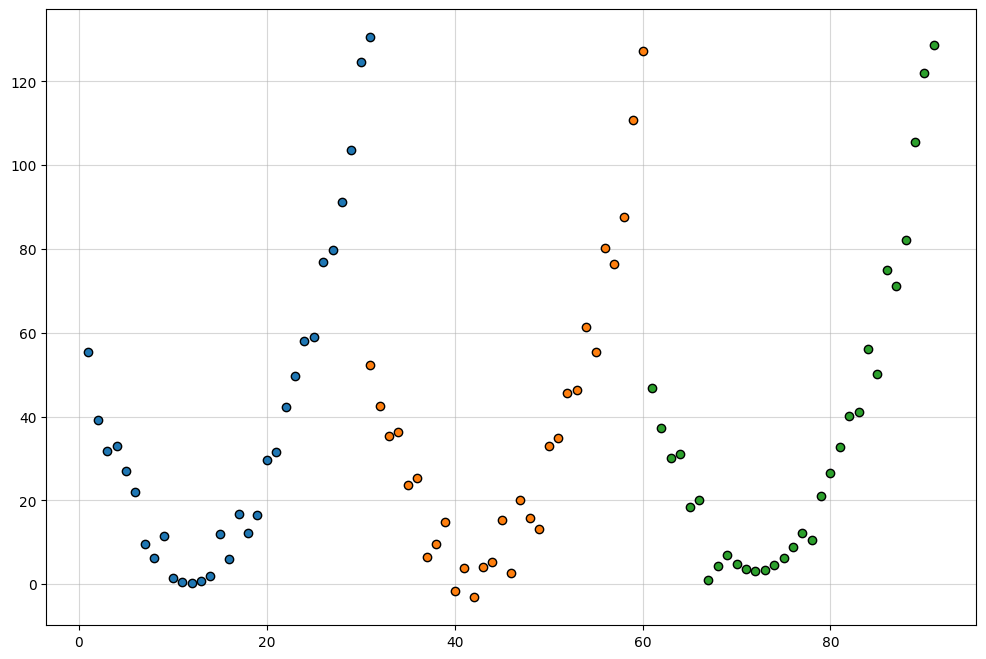

In [12]:
plt.figure(figsize=(12, 8))

plt.scatter(days, new_df["A"], ec="k", zorder=3)
plt.scatter(days + 30, new_df["S"], ec="k", zorder=3)
plt.scatter(days + 60, new_df["O_new"], ec="k", zorder=3)

plt.grid(alpha=.5)
plt.show()

In [13]:
df = pd.read_csv("months2.csv").rename(columns={"O_new": "O"}).drop(index=30)
df

,A,S,O
0,55.5,52.19,46.920000
1,39.2,42.51,37.240000
2,31.7,35.39,30.120000
3,33.0,36.31,31.040000
4,27.1,23.79,18.520000
5,22.0,25.31,20.040000
6,9.7,6.39,1.120000
7,6.2,9.51,4.240000
8,11.5,14.81,6.994111
9,1.6,-1.71,4.930251


In [14]:
days = []
months = []
for i, month in enumerate(df.columns):
	df_month = df[month]
	df_month = df_month[~np.isnan(df_month)]

	days += list(df_month.index + 1)
	months += [9 + i] * (df_month.index + 1).shape[0]


year = [2025] * len(days)
len(days), len(months), len(year)

(90, 90, 90)

In [15]:
df_date = pd.DataFrame(
	{
		"year": year,
		"month": months,
		"day": days
	}
)

df_date = pd.DataFrame(
	{
		"year": year,
		"month": months,
		"day": days
	}
)

df_date = pd.to_datetime(df_date).to_frame("Date")
df_date

,Date
0,2025-09-01
1,2025-09-02
2,2025-09-03
3,2025-09-04
4,2025-09-05
...,...
85,2025-11-26
86,2025-11-27
87,2025-11-28
88,2025-11-29


In [16]:
df_values = pd.concat([df["A"], df["S"], df["O"]], ignore_index=True).to_frame("values")
df_values = df_values[~np.isnan(df_values["values"])]

df_values

,values
0,55.50
1,39.20
2,31.70
3,33.00
4,27.10
...,...
85,75.04
86,71.12
87,82.24
88,105.54


In [17]:
df_date["values"] = df_values
df_date

,Date,values
0,2025-09-01,55.50
1,2025-09-02,39.20
2,2025-09-03,31.70
3,2025-09-04,33.00
4,2025-09-05,27.10
...,...,...
85,2025-11-26,75.04
86,2025-11-27,71.12
87,2025-11-28,82.24
88,2025-11-29,105.54


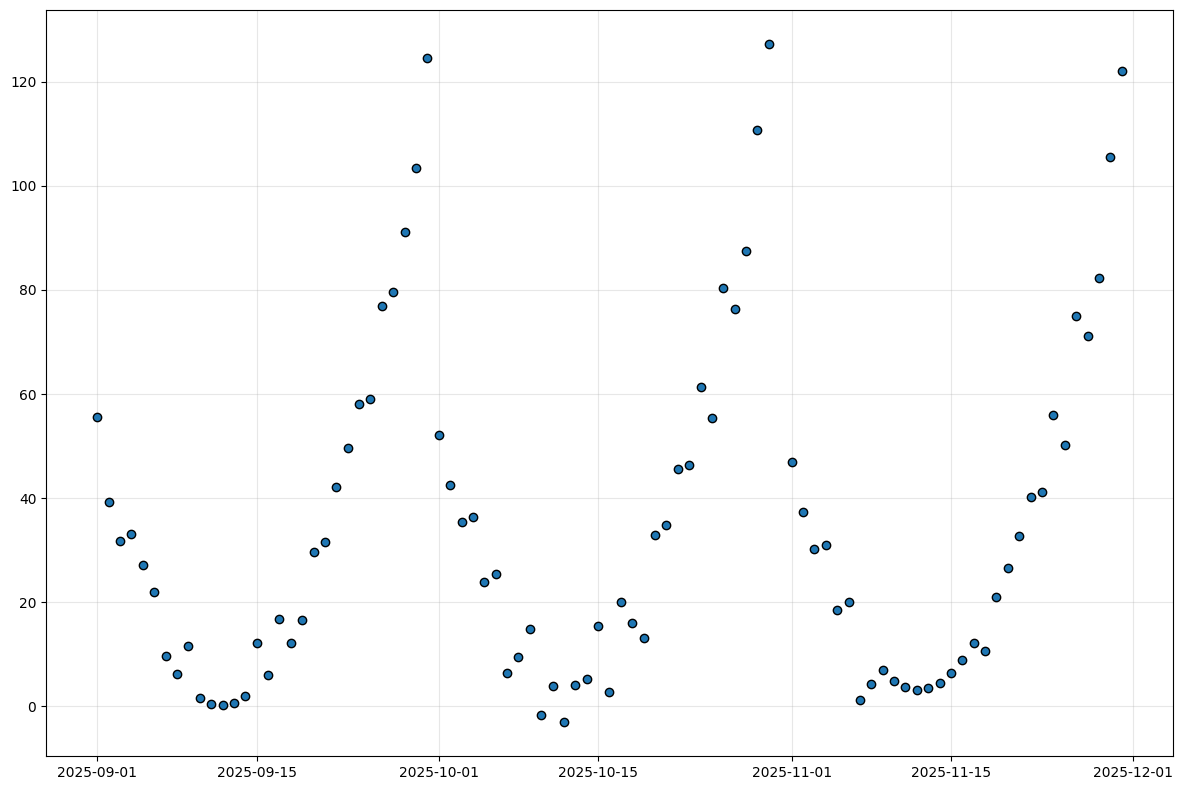

In [18]:
plt.figure(figsize=(12, 8))

plt.scatter(df_date["Date"], df_date["values"], ec="k", zorder=3)

plt.grid(alpha=.3)

plt.tight_layout()
plt.show()

In [19]:
df_date["day"] = df_date["Date"].dt.day
df_date

,Date,values,day
0,2025-09-01,55.50,1
1,2025-09-02,39.20,2
2,2025-09-03,31.70,3
3,2025-09-04,33.00,4
4,2025-09-05,27.10,5
...,...,...,...
85,2025-11-26,75.04,26
86,2025-11-27,71.12,27
87,2025-11-28,82.24,28
88,2025-11-29,105.54,29


[[-8.96775439  0.36609194]]
[58.15830482]


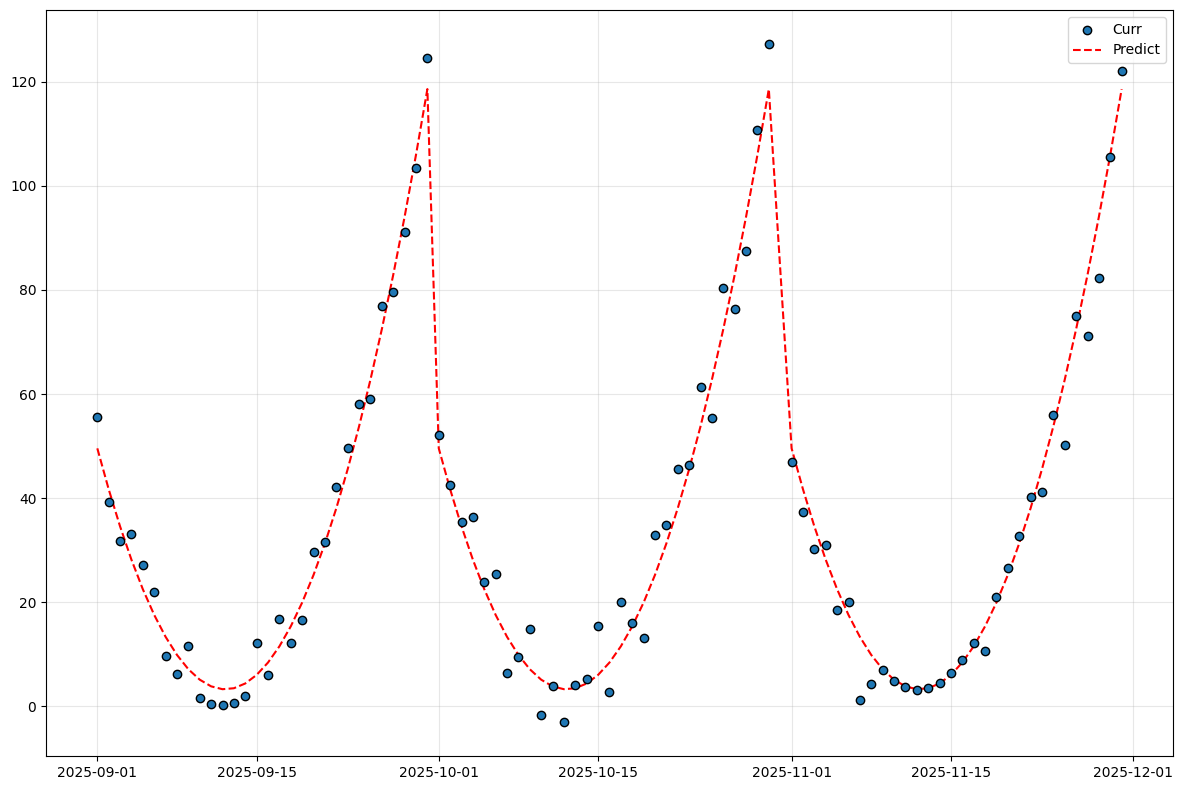

In [20]:
pipeline = make_pipeline(
	PolynomialFeatures(include_bias=False),
	LinearRegression()
).fit(df_date["day"].to_frame(), df_date["values"].to_frame())

coefs = pipeline["linearregression"].coef_
intersept = pipeline["linearregression"].intercept_

print(coefs)
print(intersept)


plt.figure(figsize=(12, 8))

plt.scatter(df_date["Date"], df_date["values"], ec="k", zorder=3, label="Curr")
plt.plot(df_date["Date"], pipeline.predict(df_date["day"].to_frame()), "r--", label="Predict")


plt.legend()
plt.grid(alpha=.3)

plt.tight_layout()
plt.show()

In [21]:
df = pd.read_csv("months.csv")

df_train_aug = df.dropna(subset=["A"])
df_train_sep = df.dropna(subset=["S"])

X_aug = df_train_aug[["day"]].values
y_aug = df_train_aug["A"].values

X_sep = df_train_sep[["day"]].values
y_sep = df_train_sep["S"].values

In [22]:
lin_reg_sep = LinearRegression()
lin_reg_sep.fit(X_sep, y_sep)
y_pred_lin_sep = lin_reg_sep.predict(X_sep)

poly = PolynomialFeatures(3)
X_poly_sep = poly.fit_transform(X_sep)

poly_reg_sep = LinearRegression()
poly_reg_sep.fit(X_poly_sep, y_sep)
y_pred_poly_sep = poly_reg_sep.predict(X_poly_sep)

In [23]:
X_oct = df[["day"]].values

oct_lin_pred = lin_reg_sep.predict(X_oct)

X_poly_oct = poly.fit_transform(X_oct)
oct_poly_pred = poly_reg_sep.predict(X_poly_oct)

df["O_lin_pred"] = oct_lin_pred
df["O_poly_pred"] = oct_poly_pred

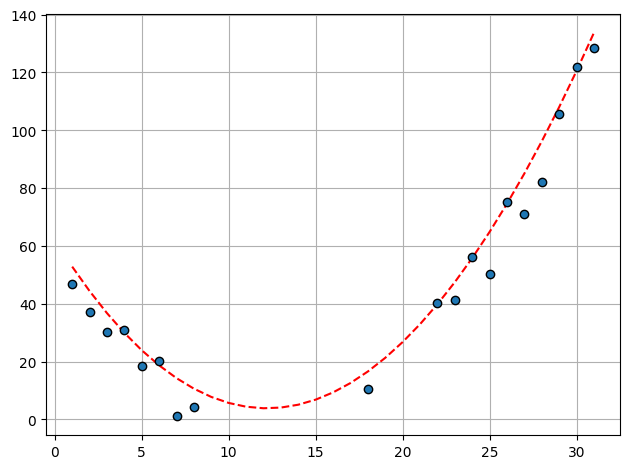

In [24]:
plt.scatter(df["day"], df["O"], ec="k", zorder=3)
plt.plot(df["day"], df["O_poly_pred"], "r--")

plt.grid()

plt.tight_layout()
plt.show()